In [1]:
#########################################################
# name: 02_dataPreparationVariableSelection.ipynb
# Description: This program merges all the files and 
# prepares the data for model input
# Input Data : ./dataScienceTask
# Output Data: ./input
##########################################################

In [2]:
# Load all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
# Read in all the datasets
df_creatinine = pd.read_csv("./dataScienceTask/T_creatinine.csv")
print("Creatinine", df_creatinine.shape)
# rename the value column
df_creatinine =  df_creatinine.rename({'value': 'vCreatinine'}, axis=1)

# read the diastolic blood pressure measurements
df_dbp = pd.read_csv("./dataScienceTask/T_DBP.csv")
print("dbp", df_dbp.shape)
# rename the value column
df_dbp =  df_dbp.rename({'value': 'vDBP'}, axis=1)

# read the glucose measurements
df_gluc = pd.read_csv("./dataScienceTask/T_glucose.csv")
print("Glucose", df_gluc.shape)
# rename the value column
df_gluc =  df_gluc.rename({'value': 'vGlucose'}, axis=1)

# read the hemoglobin measurements
df_hgb = pd.read_csv("./dataScienceTask/T_HGB.csv")
# rename the value column
df_hgb =  df_hgb.rename({'value': 'vHGB'}, axis=1)
# subset to consider only 2 years data
df_hgb = df_hgb
df_hgb =  df_hgb[df_hgb.time <=699]
# Print the shape
print("hgb", df_hgb.shape)
# read the Low-density lipoprotein measurements
df_ldl = pd.read_csv("./dataScienceTask/T_ldl.csv")
print("ldl", df_ldl.shape)
# rename the value column
df_ldl =  df_ldl.rename({'value': 'vLDL'}, axis=1)

# read the Systolic blood pressure measurements
df_sbp = pd.read_csv("./dataScienceTask/T_SBP.csv")
print("sbp", df_sbp.shape)
# rename the value column
df_sbp =  df_sbp.rename({'value': 'vSBP'}, axis=1)


Creatinine (1439, 3)
dbp (1821, 3)
Glucose (1556, 3)
hgb (1129, 3)
ldl (1261, 3)
sbp (1809, 3)


In [4]:
# Read medication data and patients data
df_demo = pd.read_csv("./dataScienceTask/T_demo.csv")
df_meds = pd.read_csv("./dataScienceTask/T_meds.csv")
df_stage = pd.read_csv("./dataScienceTask/T_stage.csv")

In [5]:
## Merging all the dataframes

merge1 = pd.merge(df_creatinine, df_dbp, how='outer', on=['id', 'time'])
merge2 = pd.merge(merge1, df_gluc, how = 'outer', on = ['id', 'time'])
merge3 = pd.merge(merge2, df_hgb, how = 'outer', on = ['id', 'time'])
merge4 = pd.merge(merge3, df_ldl, how = 'outer', on = ['id', 'time'])
merge5 = pd.merge(merge4, df_sbp, how = 'outer', on = ['id', 'time'])

In [6]:
merge5 = merge5.drop_duplicates()
merge5 = merge5.dropna(axis = 0, how="all")
merge5.shape

(3865, 8)

In [7]:
# create a duplicate df with 0 to fill missing values to check for the dimension of data for each patient.
merge5_dup = merge5.fillna(0)
num_obs = merge5_dup.groupby(['id']).agg(['count'])
num_obs.describe()
# from this

vCreatinine        time        vDBP    vGlucose        vHGB        vLDL  \
            count       count       count       count       count       count   
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    12.883333   12.883333   12.883333   12.883333   12.883333   12.883333   
std      4.042796    4.042796    4.042796    4.042796    4.042796    4.042796   
min      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   
25%     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   
50%     12.000000   12.000000   12.000000   12.000000   12.000000   12.000000   
75%     15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   
max     26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   

             vSBP  
            count  
count  300.000000  
mean    12.883333  
std      4.042796  
min      5.000000  
25%     10.000000  
50%     12.000000  
75%     15.000000  
max     26.000000

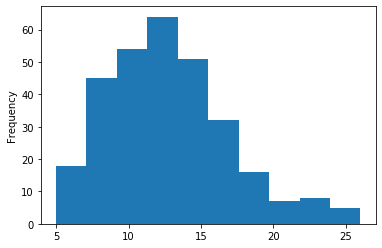

In [8]:
# distrbution of number of observations for all patient
num_obs.iloc[:,1].plot(kind='hist')

## Create medicine dosage columns

In [9]:
# Create the medicine dosage columns

merge6 = pd.merge(merge5[['id', 'time']], df_meds, how = 'left', on =['id'])

## Add empty columns for each medicine with 0 for no dosage as default
merge6 = merge6.join(pd.DataFrame(
   0, 
    index=merge6.index, 
    columns= df_meds.drug.unique() + "_dose"
))

In [11]:
# Iterate through each row and add the corresponding dosage if the time value is in between the start and end date.
for index, row in merge6.iterrows():
    if (row['start_day'] <= row['time']) & ( row['time'] <= row['end_day']):
        # take the drug name in that row and use it as the column name in which the dosage value is to be replaced
        col_name = row['drug'] + '_dose'
        merge6[col_name][index] = row['daily_dosage']

C:\Users\sindh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
## Keep only the columns created and ID and time
keep_cols = ['time', 'id', 'atorvastatin_dose', 'losartan_dose', 'metformin_dose',
       'rosuvastatin_dose', 'pravastatin_dose', 'carvedilol_dose',
       'valsartan_dose', 'metoprolol_dose', 'simvastatin_dose',
       'bisoprolol_dose', 'atenolol_dose', 'lovastatin_dose',
       'olmesartan_dose', 'irbesartan_dose', 'canagliflozin_dose',
       'dapagliflozin_dose', 'telmisartan_dose', 'labetalol_dose',
       'nebivolol_dose', 'pitavastatin_dose', 'propranolol_dose']

In [15]:
# drop duplicates 
merge6 = merge6[keep_cols].drop_duplicates()

# aggregate at ID and time level
merge6_cleaned = merge6.groupby(['id','time']).agg(['sum'])

merge6_cleaned.columns = keep_cols[2:]
merge6_cleaned = merge6_cleaned.reset_index()

In [64]:
# merge all the medication and labs data
int_data = pd.merge(merge5, merge6_cleaned, how = "left", on = ['id', 'time'])
# merge the above data with demographic data to get the final data
final_data = pd.merge(int_data, df_demo, how = "left", on = ['id'])
final_data.shape

(3865, 32)

In [65]:
# # convert categorical variables to numeric 
# using label encoder
## Performing label encoding so that the final data can have 32 columns
label_encoder = LabelEncoder()
final_data['gender'] = label_encoder.fit_transform(final_data.gender)
final_data['race'] = label_encoder.fit_transform(final_data.race)
final_data.shape

(3865, 32)

In [66]:
# Asian - 0
# Black - 1
# Hispanic - 2
# Unknown - 3
# White - 4
final_data

id  vCreatinine  time   vDBP  vGlucose   vHGB    vLDL    vSBP  \
0       0         1.29     0  95.32      6.24  13.51  161.49  134.11   
1       0         1.15   107    NaN      7.20  13.39  111.39     NaN   
2       0         1.44   286    NaN      7.01  12.84     NaN     NaN   
3       0         1.23   382    NaN      6.89  13.32  157.90     NaN   
4       0         1.08   580  87.64      5.62    NaN     NaN  154.91   
...   ...          ...   ...    ...       ...    ...     ...     ...   
3860  299          NaN   538    NaN       NaN    NaN   73.28     NaN   
3861   72          NaN   238    NaN       NaN    NaN     NaN  120.08   
3862   72          NaN   449    NaN       NaN    NaN     NaN  132.58   
3863  174          NaN   603    NaN       NaN    NaN     NaN  136.99   
3864  250          NaN   132    NaN       NaN    NaN     NaN  145.97   

      atorvastatin_dose  losartan_dose  ...  canagliflozin_dose  \
0                     0              0  ...                   0   
1                    10            100  ...                   0   
2                     0            100  ...                   0   
3                     0              0  ...                   0   
4                     0              0  ...                   0   
...                 ...            ...  ...                 ...   
3860                 10            100  ...                   0   
3861                  0              0  ...                   0   
3862                  0              0  ...                   0   
3863                  0            100  ...                   0   
3864                  0              0  ...                   0   

      dapagliflozin_dose  telmisartan_dose  labetalol_dose  nebivolol_dose  \
0                      0                 0               0               0   
1                      0                 0               0               0   
2                      0                 0               0               0   
3                      0                 0               0               0   
4                      0                 0               0               0   
...                  ...               ...             ...             ...   
3860                   0                 0               0               0   
3861                   0                 0               0               0   
3862                   0                 0               0               0   
3863                   0                 0               0               0   
3864                   0                 0               0               0   

      pitavastatin_dose  propranolol_dose  race  gender  age  
0                     0                 0     3       1   70  
1                     0                 0     3       1   70  
2                     0                 0     3       1   70  
3                     0                 0     3       1   70  
4                     0                 0     3       1   70  
...                 ...               ...   ...     ...  ...  
3860                  0                 0     0       1   84  
3861                  0                 0     4       1   81  
3862                  0                 0     4       1   81  
3863                  0                 0     4       0   80  
3864                  0                 0     4       0   79  

[3865 rows x 32 columns]

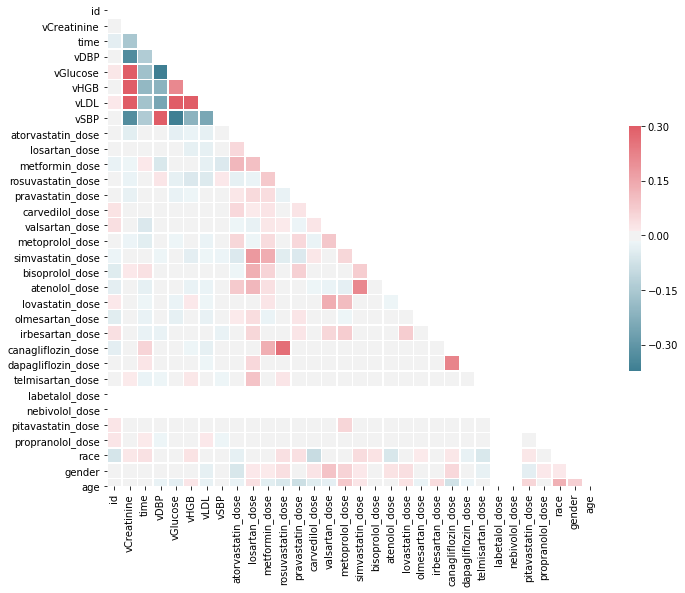

In [61]:
## Plot a correlation plot
# Compute the correlation matrix
corr = final_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Although there are 2 medicines which dont have any dosages in the time intervals it is recorded in, they will be not removed as those information may be input for future patients and it is better to keep them for continual learning of the model when more data is available.

In [67]:
## Save the data
final_data.to_csv('./input/ckd_inputdata.csv', index=False)